In [ ]:
!pip install 'qiskit[visualization]'

# Simple Coin Flip

In [ ]:
import random

In [ ]:
def classical_coin():
  num = random.randint(0, 1)
  if num == 0:
    return "heads"
  else:
    return 'tails'

In [ ]:
print(classical_coin())

heads


# Quantum Coin Flip

In [ ]:
from qiskit import QuantumCircuit, Aer, execute, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [ ]:
%matplotlib inline

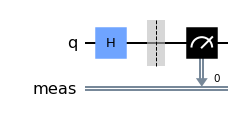

In [ ]:
qcf = QuantumCircuit(1)
qcf.h(0)
qcf.measure_all()
qcf.draw(output='mpl')

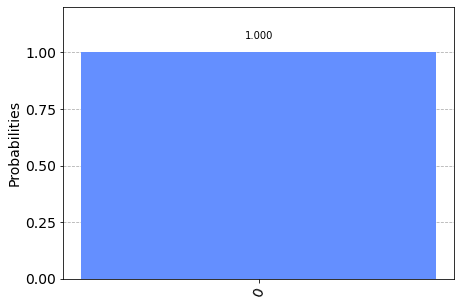

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
res = execute(qcf, backend=simulator, shots=1).result()
plot_histogram(res.get_counts())

# Running on an IBM quantum computer

In [ ]:
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

In [ ]:
IBMQ.save_account('8f7b971b8eeb862e530b7c1086c454c32dfc9891fe0e8456b7d801a503832f4a2a912f03993819d38cb2fc1fd0cb5319b4a1f5760ae2250cc3fade23d4c1f956')

In [ ]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
def runQuantumComputer(qc: QuantumCircuit):
  provider = IBMQ.get_provider('ibm-q')
  backend = provider.get_backend('ibmq_athens')
  job = execute(qc, backend=backend, shots=1)
  job_monitor(job)
  return job.result()

Job Status: job has successfully run


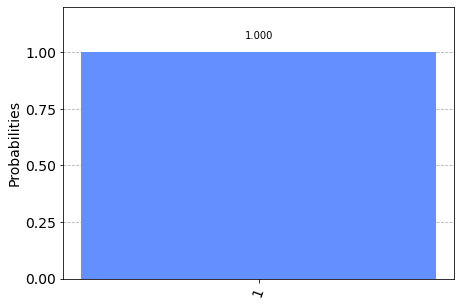

In [ ]:
res = runQuantumComputer(qcf).get_counts()
plot_histogram(res)

# Quantum Random Number Generator

In [ ]:
def quantum_rng():
  rng_qc = QuantumCircuit(4)
  rng_qc.h([0, 1, 2, 3])
  rng_qc.measure_all()
  sim = Aer.get_backend('qasm_simulator')
  res = execute(rng_qc, backend=sim, shots = 1).result()
  return res

In [ ]:
while True:
  counts_temp = quantum_rng().get_counts()
  counts = dict((y,x) for x,y in counts_temp.items())
  dec = int(counts[1],2)

  if dec <= 10:
    print(dec)
    break

3
